In [4]:
import cv2
import numpy as np

In [5]:
img = cv2.imread('v0d00fg10000cb9gacjc77u3gp5qggd0_3_.jpg', cv2.IMREAD_GRAYSCALE)
#print(img)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
'''水平投影'''
def getHProjection(image):
    hProjection = np.zeros(image.shape,np.uint8)
    #图像高与宽
    (h,w)=image.shape
    #长度与图像高度一致的数组
    h_ = [0]*h
    #循环统计每一行白色像素的个数
    for y in range(h):
        for x in range(w):
            if image[y,x] == 255:
                h_[y]+=1
    #绘制水平投影图像
    for y in range(h):
        for x in range(h_[y]):
            hProjection[y,x] = 255
    cv2.imshow('hProjection2',hProjection)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return h_

In [11]:
def getVProjection(image):
    vProjection = np.zeros(image.shape,np.uint8);
    #图像高与宽
    (h,w) = image.shape
    #长度与图像宽度一致的数组
    w_ = [0]*w
    #循环统计每一列白色像素的个数
    for x in range(w):
        for y in range(h):
            if image[y,x] == 255:
                w_[x]+=1
    #绘制垂直平投影图像
    for x in range(w):
        for y in range(h-w_[x],h):
            vProjection[y,x] = 255
    cv2.imshow('vProjection',vProjection)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return 0

In [13]:
# getHProjection(cv2.imread('v0d00fg10000cb9goijc77u3mh2r0r90_1_.jpg', cv2.IMREAD_GRAYSCALE))
cv2.imshow('1',cv2.imread('v0d00fg10000cb9kmn3c77ued6gbe3h0_8_.jpg', cv2.IMREAD_GRAYSCALE))
getVProjection(cv2.imread('v0d00fg10000cb9kmn3c77ued6gbe3h0_8_.jpg', cv2.IMREAD_GRAYSCALE))

0

In [14]:
carplate_haar_cascade = cv2.CascadeClassifier("haarcascade_russian_plate_number.xml")

def carplate_detect(image):
    carplate_overlay = image.copy()
    carplate_rects = carplate_haar_cascade.detectMultiScale(carplate_overlay, scaleFactor = 1.1, minNeighbors = 3)
    for x, y, w, h in carplate_rects:
        cv2.rectangle(carplate_overlay, (x, y), (x+w, y+h), (255, 0 ,0 ), 5)
        return carplate_overlay

In [15]:
detected_carplate_img = carplate_detect(cv2.imread('v0d00fg10000cb9gacjc77u3gp5qggd0_3_.jpg', cv2.IMREAD_ANYCOLOR))
cv2.imshow("detected_carplate_img", detected_carplate_img)

In [4]:
import cv2  # opencv库

# 读取图片
image = cv2.imread('v0d00fg10000cb9kmn3c77ued6gbe3h0_8_.jpg')
# 加载模型库
cv2.imshow('1', image)
face_model = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')
# 图片进行灰度处理
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# 车牌检测
faces = face_model.detectMultiScale(gray)
# 标记车牌
for (x, y, w, h) in faces:
    # 1.原始图片；2坐标点；3.矩形宽高 4.颜色值(RGB)；5.线框
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
# 显示图片窗口
image2=cv2.resize(image,dsize=(500,500))
cv2.imshow('faces', image2)
# 窗口暂停
cv2.waitKey(0)
# 销毁窗口
cv2.destroyAllWindows()

In [290]:
import cv2
import os
import math
from tqdm import trange
import random
import seaborn as sns
import multiprocessing as mp

In [19]:
'''水平投影'''
def getHProjection(image,flag=0):
    hProjection = np.zeros(image.shape,np.uint8)
    #图像高与宽
    (h,w)=image.shape
    #长度与图像高度一致的数组
    h_ = [0]*h
    #循环统计每一行白色像素的个数
    for y in range(h):
        for x in range(w):
            if image[y,x] == 255:
                h_[y]+=1
    #绘制水平投影图像
    for y in range(h):
        for x in range(h_[y]):
            hProjection[y,x] = 255
    if flag == 1:
        cv2.imshow('hProjection2',hProjection)
#         cv2.waitKey(0)
#         cv2.destroyAllWindows()
    return h_

def getVProjection(image,flag=0):
    vProjection = np.zeros(image.shape,np.uint8);
    #图像高与宽
    (h,w) = image.shape
    #长度与图像宽度一致的数组
    w_ = [0]*w
    #循环统计每一列白色像素的个数
    for x in range(w):
        for y in range(h):
            if image[y,x] == 255:
                w_[x]+=1
    #绘制垂直平投影图像
    for x in range(w):
        for y in range(h-w_[x],h):
            vProjection[y,x] = 255
    if flag == 1:
        cv2.imshow('vProjection',vProjection)
    return w_

In [62]:
file_name_list = os.listdir('images')
# print(file_name_list)
img = cv2.imread('images/' + file_name_list[0], cv2.IMREAD_GRAYSCALE)
cv2.imshow('image',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
h = getHProjection(img)
w = getVProjection(img)

In [280]:
def split_h(image, h, w):
    # 判断是横屏还是竖屏，并相应的针对性处理
    if len(h) > len(w):
        # 竖屏模式，只考虑前向八分之一和后向八分之一的图片
        split_range = 8
    else:
        split_range = 5
    max_ = 0
    start_max = 0
    length = 0
    # 前向
    for i in range(int(len(h)/split_range)):
        if h[i] != 0:
            length += 1
        else:
            if length > max_:
                max_ = length
                start_max = i - length
            length = 0
    # 后向
    for i in range(int(len(h)/split_range)):
        if h[i + int(len(h)/split_range*(split_range-1))] != 0:
            length += 1
        else:
            if length > max_:
                max_ = length
                start_max = i - length + int(len(h)/split_range*(split_range-1))
            length = 0
    # 错误处理
    if start_max == 0 and max_ == 0:
        max_ = len(h)-1
    return start_max, start_max+max_

In [281]:
def split_w(img, h, w):
    #滑动窗口,简单前后向遍历
    start = 0
    end = len(w)-1
    for i in range(len(w)):
        if w[i] == 0:
            pass
        else:
            start = i
            break
    for i in range(len(w)):
        if w[len(w)-1-i] == 0:
            pass
        else:
            end = len(w)-i
            break
    return start, end
                
    

In [57]:
for i in trange(len(file_name_list)):
    img = cv2.imread('images/' + file_name_list[i], cv2.IMREAD_GRAYSCALE)
    h = getHProjection(img)
    w = getVProjection(img)
    start_h, end_h = split_h(img, h, w)
    # 不好切得直接扔掉
    if start_h == 0:
        continue
    img = img[start_h : end_h]
    w_new = getVProjection(img)
    start_w, end_w = split_w(img, h, w_new)
    if 10 < (end_h - start_h) < 20 and 100 < (end_w - start_w) < 200:
        pass
    else:
        continue
    img = img[:,start_w:end_w]
    cv2.imwrite('split_images/'+file_name_list[i], img)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 69/69 [01:02<00:00,  1.10it/s]


In [292]:
# 随机切五千张
file_name_list = os.listdir("D:/dataset_all/bytedance/ocr_data_split/data/train_random_8w/train_set_random")
file_name_list = random.sample(file_name_list,40000)
global file_name_list

def worker(location):
    sub_list = file_name_list[i*8000:(i+1)*8000].copy()
    for i in trange(len(sub_list)):
        img = cv2.imread("D:/dataset_all/bytedance/ocr_data_split/data/train_random_8w/train_set_random/" + sub_list[i], cv2.IMREAD_GRAYSCALE)
        h = getHProjection(img)
        w = getVProjection(img)
        start_h, end_h = split_h(img, h, w)
        # 不好切得直接扔掉
        if start_h == 0:
            continue
        img = img[start_h : end_h]
        w_new = getVProjection(img)
        start_w, end_w = split_w(img, h, w_new)
        if 10 < (end_h - start_h) < 20 and 100 < (end_w - start_w) < 200:
            pass
        else:
            continue
        img = img[:,start_w:end_w]
        cv2.imwrite('split_images_4w/'+sub_list[i], img)
    
    
    
# p1 = mp.Process(target=worker,args=(0,))
# p2 = mp.Process(target=worker,args=(1,))
# p1.start()
# p1.join()
# p2.start()
# p2.join()
record = []
for i in range(5):
    process = multiprocessing.Process(target=worker, args=(i,))
    process.start()
    record.append(process)

for process in record:
    process.join()


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:13<00:00, 372.00it/s]


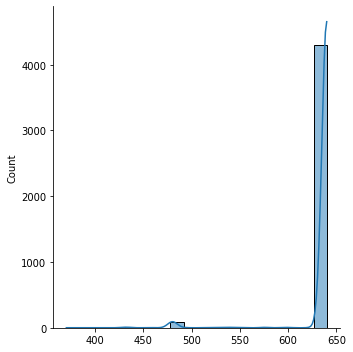

In [14]:
# 降低分辨率之后再切割（训练集测试集通用切割）

# 查看训练集和测试集中的平均宽和高，以便对训练集进行降分辨倍率,降低两倍的分辨率
h_total = 0
w_total = 0
h_list = []
num = 0
file_name_list = os.listdir("D:/dataset_all/bytedance/ocr_data_split/data/train_random_8w/train_set_random")
file_name_list = random.sample(file_name_list,5000)
for i in trange(len(file_name_list)):
    img = cv2.imread("D:/dataset_all/bytedance/ocr_data_split/data/train_random_8w/train_set_random/" + file_name_list[i], cv2.IMREAD_GRAYSCALE)
    h= len(img)
    w= len(img[0])
#     if h > w:
#         h_total += h
#         w_total += w
#         num += 1
# print('平均高和宽为:', h_total/num, w_total/num, num)
# 看一下是否有特殊的分布
    if h > w:
        h_list.append(h)
sns.displot(h_list,bins=20,kde=True)

In [5]:
# 降低训练集分辨率，试一下maxpooling和averagepooling
import torch
import torch.nn as nn
import torch.nn.functional as F
import cv2
import os

file_name_list = os.listdir("D:/python_project/learn-pytorch/bytedance_competition/split_images")
img = cv2.imread("D:/python_project/learn-pytorch/bytedance_competition/split_images/" + file_name_list[2], cv2.IMREAD_GRAYSCALE)

x = torch.from_numpy(img).float()
x = x.unsqueeze(0)
# 先定义x
layer = nn.MaxPool2d(2, stride=1)
# 括号内第一个参数是:窗口的大小,第二个是移动的步长距离
out1 = layer(x)
print(out1.size())

out1 = out1.squeeze(0)
img_low = out1.numpy()
img_low = img_low.astype(np.uint8)

cv2.imshow('1',img)
cv2.imshow('2',img_low)
cv2.waitKey(0)
cv2.destroyAllWindows()

torch.Size([1, 15, 160])


In [11]:
# 全部用maxpooling再生成低分辨率的训练集
from tqdm import trange

layer = nn.MaxPool2d(2, stride=2)

file_name_list = os.listdir("D:/python_project/learn-pytorch/bytedance_competition/split_images")
for i in trange(len(file_name_list)):
    img = cv2.imread("D:/python_project/learn-pytorch/bytedance_competition/split_images/" + file_name_list[i], cv2.IMREAD_GRAYSCALE)
    x = torch.from_numpy(img).float()
    x = x.unsqueeze(0)
    out1 = layer(x)
    out1 = out1.squeeze(0)
    img_low = out1.numpy()
    img_low = img_low.astype(np.uint8)
    cv2.imwrite('low_maxpool_split_images/'+file_name_list[i], img_low)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3019/3019 [00:17<00:00, 171.59it/s]


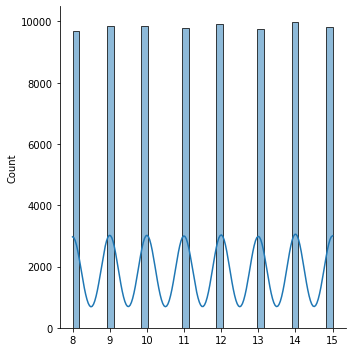

In [27]:
# 看一下抖音号位数有什么特点
import csv
import seaborn as sns
from matplotlib import pyplot as plt

filepath = "D:/dataset_all/bytedance/ocr_data_split/data/dataset_train_random.csv"
with open(filepath, 'r') as csvfile:
    reader = csv.reader(csvfile)
    data = [row for row in reader]
    
length = [len(row[1]) for row in data]
sns.displot(length,kde=True)

In [51]:
# 尝试按单字符切分
file_name_list = os.listdir("D:/python_project/learn-pytorch/bytedance_competition/low_avgpool_split_images")
img = cv2.imread("D:/python_project/learn-pytorch/bytedance_competition/low_avgpool_split_images/" + file_name_list[7],cv2.IMREAD_GRAYSCALE)
cv2.imshow('1',img)
# h = getHProjection(img,1)
# w = getVProjection(img,1)

cv2.waitKey(0)
cv2.destroyAllWindows()

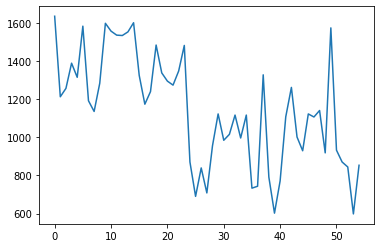

In [55]:
V = [sum(img[:,i]) for i in range(len(img[0]))]
plt.plot([_ for _ in range(len(V))],V)
plt.show()

In [41]:
from scipy import stats
# 计算推土机距离
def cal_EM_distance(a,b):
    return stats.wasserstein_distance(a,b)

In [331]:
# 找一个抖音号位置的平均值作为模板，使用EM距离作比较
sum_num = [0 for _ in range(200)]
file_name_list = os.listdir("D:/python_project/learn-pytorch/bytedance_competition/split_images_4w/")
for i in trange(len(file_name_list)):
    img = cv2.imread("D:/python_project/learn-pytorch/bytedance_competition/split_images_4w/" + file_name_list[i],cv2.IMREAD_GRAYSCALE)
    V = [sum(img[:,i]) for i in range(len(img[0]))]
    for i in range(len(V)):
        sum_num[i] += V[i]
model = [int(sum_num[i]/len(file_name_list)/10) for i in range(57)]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20432/20432 [00:43<00:00, 466.12it/s]


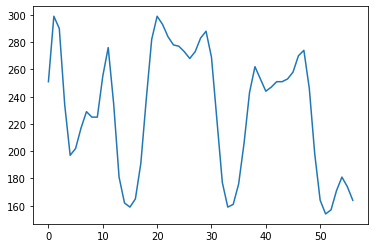

In [333]:
plt.plot([_ for _ in range(len(model))],model)
plt.show()

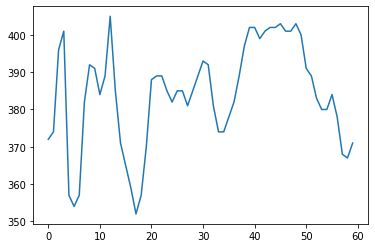

[483.2, 481.2, 481.6, 483.0, 478.2, 468.8, 465.6, 459.0, 456.0, 456.8, 459.6, 451.6, 441.4, 441.2]


IndexError: list index out of range

In [387]:
# 除以10做缩放
# 要检测出50-60之间比较低的峰
file_name_list = os.listdir("D:/python_project/learn-pytorch/bytedance_competition/split_images_4w")
img = cv2.imread("D:/python_project/learn-pytorch/bytedance_competition/split_images_4w/" + file_name_list[0],cv2.IMREAD_GRAYSCALE)

small_model = model[40:].copy()

current = 0
V = [int(sum(img[:,i])/10) for i in range(60)]
plt.plot([_ for _ in range(len(V))],V)
plt.show()

# for _ in range(10):
#     V = [int(sum(img[:,i])/10) for i in range(50 + _)]
#     dist = stats.wasserstein_distance(model,V)
#     print(dist)
#     if dist > current:
#         current = dist
#     else:
#         location = 50 + _
#         break
# print(location)

V = [int(sum(img[:,i])/10) for i in range(60)]
location_around = V[45:]
location_around = [location_around[i] + location_around[i+1] * 0.2 for i in range(14)]
print(location_around)
peak = []
peak_num = []
past = 0
flag = 0
for i in range(len(location_around)):
    if flag == 1:
        if location_around[i] < past:
            peak.append(i-1)
            flag = 0
        else:
            flag = 0
    if location_around[i] > past:
        flag = 1
        past = location_around[i]
    else:
        past = location_around[i]
peak_num = [location_around[item] for item in peak]
top = peak[peak_num.index(min(peak_num))]
current = location_around[top]
for i in range(7):
    if location_around[top + i] > current:
        break
    else:
        current = location_around[top + i]
location = top + i + 44
print(location)
print(V[location:])

In [28]:
# 切掉抖音号
file_name_list = os.listdir("D:/dataset_all/bytedance/ocr_data_split/data/test_random_2w/test_set_random_high_split")
for i in trange(len(file_name_list)):
    try:
        img = cv2.imread("D:/dataset_all/bytedance/ocr_data_split/data/test_random_2w/test_set_random_high_split/" + file_name_list[i],cv2.IMREAD_GRAYSCALE)
        V = [int(sum(img[:,i])/10) for i in range(60)]
        location_around = V[45:]
        location_around = [location_around[i] + location_around[i+1] * 0.2 for i in range(14)]
        peak = []
        peak_num = []
        past = 0
        flag = 0
        for j in range(len(location_around)):
            if flag == 1:
                if location_around[j] < past:
                    peak.append(j-1)
                    flag = 0
                else:
                    flag = 0
            if location_around[j] > past:
                flag = 1
                past = location_around[j]
            else:
                past = location_around[j]
        peak_num = [location_around[item] for item in peak]
        top = peak[peak_num.index(min(peak_num))]
        current = location_around[top]
        for j in range(13-top):
            if location_around[top + j] > current:
                break
            else:
                current = location_around[top + j]
        location = top + j + 44
        img = img[:,location:]
        cv2.imwrite("D:/dataset_all/bytedance/ocr_data_split/data/test_random_2w/test_set_random_high_resplit/"+file_name_list[i], img)
    except:
        pass

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8369/8369 [00:12<00:00, 645.69it/s]


In [30]:
import csv

In [52]:
# 对文件按照标签改名
filepath = "D:/dataset_all/bytedance/ocr_data_split/data/dataset_train_random.csv"
with open(filepath, 'r') as csvfile:
    reader = csv.reader(csvfile)
    data = [row for row in reader]

file_name_list = os.listdir("D:/python_project/learn-pytorch/bytedance_competition/split_images_4w")
for j in trange(len(file_name_list)):
    for i in range(len(data)):
        if data[i][0] == file_name_list[j]:
            os.rename("D:/python_project/learn-pytorch/bytedance_competition/split_images_4w/" + file_name_list[j], "D:/python_project/learn-pytorch/bytedance_competition/split_images_4w/" + data[i][1] + '.jpg')
            break

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20430/20430 [03:58<00:00, 85.64it/s]


In [154]:
# 用卷积预测一下抖音号的长度
import shutil

# 先按照抖音号长度生成数据集
file_name_list = os.listdir("D:/python_project/learn-pytorch/bytedance_competition/low_avgpool_resplit_images")
for i in trange(len(file_name_list)):
    path = "D:/python_project/learn-pytorch/bytedance_competition/length_classifier/" + str(len(file_name_list[i])-4) + "/" + file_name_list[i]
    shutil.copyfile("D:/python_project/learn-pytorch/bytedance_competition/low_avgpool_resplit_images/" + file_name_list[i], path)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3019/3019 [00:05<00:00, 508.29it/s]


In [171]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
import torchvision

train_loader = torch.utils.data.DataLoader(
    ImageFolder('./length_classifier', transform=torchvision.transforms.Compose([
                                  torchvision.transforms.Resize([8,70]),
                                  torchvision.transforms.ToTensor(),
                              ])),
    batch_size=32, shuffle=True
)
 
val_loader = torch.utils.data.DataLoader(
    ImageFolder('./length_classifier', transform=torchvision.transforms.Compose([
                                  torchvision.transforms.Resize([8,70]),
                                  torchvision.transforms.ToTensor(),
                              ])),
    batch_size=300, shuffle=True
)

In [172]:
import torch.nn as nn
import torch.nn.functional as F
import tqdm

# 定义卷积神经网络结构
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 输入是[8,70]
        self.net = nn.Sequential(
            nn.Conv2d(3, 6, kernel_size=3, stride=1, padding=0),
            nn.BatchNorm2d(6),
#             nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
            nn.Conv2d(6, 10, kernel_size=3, stride=1, padding=0),
            nn.BatchNorm2d(10),
            nn.MaxPool2d(kernel_size=2, stride=1, padding=0),
            nn.Flatten(),
            nn.Linear(1950,640),
            nn.ReLU(inplace=True),
            nn.Linear(640, 84), 
            nn.ReLU(inplace=True),
            nn.Linear(84, 8)
        )

    def forward(self, x):
        x = self.net(x)
        return x

# create a complete CNN
model = Net()
print(model)


criteon = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
for epoch in range(40):
    model.train()
    correct_train = 0
    for batch_idx, (x, target) in enumerate(train_loader):
        logits = model(x)
        loss = criteon(logits, target)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
        correct_train += torch.eq(logits.data.max(1)[1], target.data).sum()
        
    print(epoch, 'train acc: ', correct_train/len(train_loader.dataset))
    
    # eval
    model.eval()
    correct = 0
    for x, target in val_loader:
        logits = model(x)
        correct += torch.eq(logits.data.max(1)[1], target.data).sum()
        
    acc = (correct/len(val_loader.dataset)).item()
    print('eval acc: ', acc)

Net(
  (net): Sequential(
    (0): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Conv2d(6, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
    (5): Flatten(start_dim=1, end_dim=-1)
    (6): Linear(in_features=1950, out_features=640, bias=True)
    (7): ReLU(inplace=True)
    (8): Linear(in_features=640, out_features=84, bias=True)
    (9): ReLU(inplace=True)
    (10): Linear(in_features=84, out_features=8, bias=True)
  )
)
0 train acc:  tensor(0.1722)
eval acc:  0.25770121812820435
1 train acc:  tensor(0.2690)
eval acc:  0.3570718765258789
2 train acc:  tensor(0.3422)
eval acc:  0.4263001084327698
3 train acc:  tensor(0.3842)
eval acc:  0.4895660877227783
4 train acc:  tensor(0.4366)
eval acc:  0.48492878675460815
5 train acc: 

In [174]:
# 试一下直接等距分割,两边各补充一个像素
# 大概可以得知抖音号的位数，后面先用groundtruth来做下一步
file_name_list = os.listdir("D:/python_project/learn-pytorch/bytedance_competition/length_classifier/8")
img = cv2.imread("D:/python_project/learn-pytorch/bytedance_competition/length_classifier/8/"+file_name_list[0], cv2.IMREAD_GRAYSCALE)

cv2.imshow('1',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [217]:
for i in range(10):
    os.mkdir("D:/python_project/learn-pytorch/bytedance_competition/char_classifier/val/" + str(i))

In [214]:
file_name_list = os.listdir("D:/python_project/learn-pytorch/bytedance_competition/length_classifier/15")
for j in trange(len(file_name_list)):
    img = cv2.imread("D:/python_project/learn-pytorch/bytedance_competition/length_classifier/15/"+file_name_list[j], cv2.IMREAD_GRAYSCALE)
    flag = file_name_list[j][:15]
    length = len(img[0])
    split = int(length/15)
    if length%15 == 0:
        plus_time = 100
    else:
        plus_time = int(15/(length%15))

    start = 0
    for i in range(15):
        if i%plus_time == 0:
            start += 1
        if i == 0:
            img_tmp = img[:,start:start+split+1]
        elif i == 14:
            img_tmp = img[:,start-1:]
        else:
            img_tmp = img[:,start-1:start+split+1]
        start += split
        try:
            if 'A' <= file_name_list[j][i] <= 'Z':
                cv2.imwrite("D:/python_project/learn-pytorch/bytedance_competition/char_classifier/"+file_name_list[j][i].lower()+file_name_list[j][i].lower()+'/'+file_name_list[j], img_tmp)
            else:
                cv2.imwrite("D:/python_project/learn-pytorch/bytedance_competition/char_classifier/"+file_name_list[j][i]+'/'+file_name_list[j], img_tmp)
        except:
            pass

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 162/162 [00:02<00:00, 55.45it/s]


In [221]:
#构建训练集和验证集，7:3
import random
father_file_name_list = os.listdir("D:/python_project/learn-pytorch/bytedance_competition/char_classifier/train")
for i in range(len(father_file_name_list)):
    child_file_name_list = os.listdir("D:/python_project/learn-pytorch/bytedance_competition/char_classifier/train/" + father_file_name_list[i])
    val = random.sample(child_file_name_list, int(len(child_file_name_list)*0.3))
    for item in val:
        shutil.move("D:/python_project/learn-pytorch/bytedance_competition/char_classifier/train/" + father_file_name_list[i] + '/' + item, "D:/python_project/learn-pytorch/bytedance_competition/char_classifier/val/" + father_file_name_list[i] + '/' + item)

In [222]:
# 构建模型训练
from torchvision.datasets import ImageFolder
from torchvision import transforms
import torchvision

train_loader = torch.utils.data.DataLoader(
    ImageFolder('./char_classifier/train', transform=torchvision.transforms.Compose([
                                  torchvision.transforms.Resize([8,8]),
                                  torchvision.transforms.ToTensor(),
                              ])),
    batch_size=32, shuffle=True
)
 
val_loader = torch.utils.data.DataLoader(
    ImageFolder('./char_classifier/val', transform=torchvision.transforms.Compose([
                                  torchvision.transforms.Resize([8,8]),
                                  torchvision.transforms.ToTensor(),
                              ])),
    batch_size=300, shuffle=True
)

In [226]:
import torch.nn as nn
import torch.nn.functional as F
import tqdm

# 定义卷积神经网络结构
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 输入是[8,8]
        self.net = nn.Sequential(
            nn.Conv2d(3, 6, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(6),
#             nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
            nn.Conv2d(6, 10, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(10),
            nn.MaxPool2d(kernel_size=2, stride=1, padding=0),
            nn.Flatten(),
            nn.Linear(490,256),
            nn.ReLU(inplace=True),
            nn.Linear(256, 128), 
            nn.ReLU(inplace=True),
            nn.Linear(128, 62)
        )

    def forward(self, x):
        x = self.net(x)
        return x

# create a complete CNN
model = Net()
print(model)


criteon = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
for epoch in range(10):
    model.train()
    correct_train = 0
    for batch_idx, (x, target) in enumerate(train_loader):
        logits = model(x)
        loss = criteon(logits, target)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
        correct_train += torch.eq(logits.data.max(1)[1], target.data).sum()
        
    print(epoch, 'train acc: ', correct_train/len(train_loader.dataset))
    
    # eval
    model.eval()
    correct = 0
    for x, target in val_loader:
        logits = model(x)
        correct += torch.eq(logits.data.max(1)[1], target.data).sum()
        
    acc = (correct/len(val_loader.dataset)).item()
    print('eval acc: ', acc)
    
torch.save(model.state_dict(), 'ckpt_10.mdl')

Net(
  (net): Sequential(
    (0): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Conv2d(6, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
    (5): Flatten(start_dim=1, end_dim=-1)
    (6): Linear(in_features=490, out_features=256, bias=True)
    (7): ReLU(inplace=True)
    (8): Linear(in_features=256, out_features=128, bias=True)
    (9): ReLU(inplace=True)
    (10): Linear(in_features=128, out_features=62, bias=True)
  )
)
0 train acc:  tensor(0.1343)
eval acc:  0.22525857388973236
1 train acc:  tensor(0.2571)
eval acc:  0.2936309278011322
2 train acc:  tensor(0.3247)
eval acc:  0.3302122950553894
3 train acc:  tensor(0.3727)
eval acc:  0.36799129843711853
4 train acc:  tensor(0.3991)
eval acc:

In [278]:
print('读取已经训练过10epochs的参数')
model.load_state_dict(torch.load('ckpt_10.mdl'))

total = sum([param.nelement() for param in model.parameters()])
print("Number of parameter: %.2fM" % (total/1e6))

path = "D:/python_project/learn-pytorch/bytedance_competition/char_classifier/val/5"
file_name_list = os.listdir(path)
img = cv2.imread(path+'/'+file_name_list[11], cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, [8,8]).astype(np.float32)
img /= 255
img =  np.broadcast_to(img,(3,)+img.shape)
img = torch.from_numpy(img)
img = img.unsqueeze(0)
# print(img.shape)

model.eval()
with torch.no_grad():
    logits = model(img)
pred = logits.data.max(1)[1].item()
print(pred)

读取已经训练过10epochs的参数
Number of parameter: 0.17M
5


In [23]:
path = "D:/dataset_all/bytedance/ocr_data_split/data/test_random_2w/test_set_random"
file_name_list = os.listdir(path)
img = cv2.imread(path+'/'+file_name_list[60], cv2.IMREAD_GRAYSCALE)
h = len(img[0])
w = len(img)

img_high = cv2.resize(img, [3*h, 3*w])
img_high_cubic = cv2.resize(img, [3*h, 3*w], interpolation=cv2.INTER_CUBIC)

cv2.imshow('1',img)
cv2.imshow('2',img_high)
cv2.imshow('3',img_high_cubic)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [51]:
# 使用高反差保留处理图片
from skimage.filters import gaussian
new_img = (img_high_cubic[:40] * 1.0).copy()
gaussian_out = gaussian(new_img, sigma=2, multichannel=True)
img_out = (new_img - gaussian_out) * 2 + new_img
img_out = img_out / 255.0
mask_1 = img_out < 0
mask_2 = img_out > 1
img_out = img_out * (1-mask_1)
img_out = img_out * (1-mask_2) + mask_2
ret, img_two = cv2.threshold((img_out*255.0).astype(np.uint8), 150, 255,  cv2.THRESH_BINARY)

cv2.imshow('1',img_high_cubic[:40])
cv2.imshow('2',img_out)
cv2.imshow('3',img_two)
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\CYF\AppData\Local\Temp\ipykernel_19388\1175119757.py:4: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  gaussian_out = gaussian(new_img, sigma=2, multichannel=True)


In [49]:
print((img_out*255).astype(np.uint8)[4])
cv2.imshow('3',(img_out*255).astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()

[ 69  65  38   8  19 102 206 255 207  99  19  13  50  80  76  61  50  43
  43  78 160 252 255 244 144  59  32  46  61  58  55  64  87 113 134 136
 126 123 125 133 163 228 255 255 255 209 141 114 113 118 121 128 124 104
  79  57  43  42  58  88 122 182 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 186 111  70  65  63  53  54  54  56  60  62  63
  62  52  32  11   0   0   0   0   0   0   0   0   0   0   0   0   5  21
  36  49  58  62  53  28   1   0   0   0   0   3  32  56  68  68  60  51
  41  24   7   0   0   0   0   0   0   0   0  12  26  38  47  51  38  11
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  11  26  14
   0   0   0  13  36  43  40  33  28  17   7   0   0   0   0  23  42  40
  26   1   0   0   0   0   0   0   0   0   0   0   4  18  28  30  32  29
  22  20  24  29  33  34  29  27  24  22  22  26  28  30  27  24   9   0
   0   0   0   0  10  22  22  24  27  25  26  26  26  25  21  18  17  17
  19  22  23  24  26  27  25  25  23  21  21  24  2

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19675/19675 [00:22<00:00, 868.24it/s]


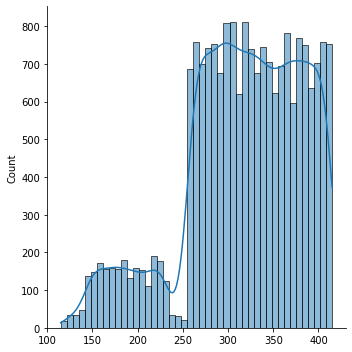

In [54]:
# 先只是用差值法，把测试集抠出来
# 先看一下测试集照片尺寸的分布情况
path = "D:/dataset_all/bytedance/ocr_data_split/data/test_random_2w/test_set_random"
file_name_list = os.listdir(path)

H = []
for i in trange(len(file_name_list)):
    img = cv2.imread(path + '/' + file_name_list[i], cv2.IMREAD_GRAYSCALE)
    H.append(len(img))
sns.displot(H,kde=True)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19675/19675 [00:12<00:00, 1540.97it/s]


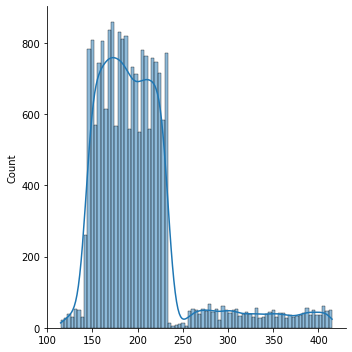

In [55]:
V = []
for i in trange(len(file_name_list)):
    img = cv2.imread(path + '/' + file_name_list[i], cv2.IMREAD_GRAYSCALE)
    V.append(len(img[0]))
sns.displot(V,kde=True)

In [59]:
# 都扩大成 700 * 450的图片
path = "D:/dataset_all/bytedance/ocr_data_split/data/test_random_2w/test_set_random"
file_name_list = os.listdir(path)
for i in trange(len(file_name_list)):
    img = cv2.imread(path + '/' + file_name_list[i], cv2.IMREAD_GRAYSCALE)
    h = len(img[0])
    w = len(img)
    if h < w:
        img_high = cv2.resize(img, [450, 700], interpolation=cv2.INTER_CUBIC)
    else:
        img_high = cv2.resize(img, [700, 450], interpolation=cv2.INTER_CUBIC)
    cv2.imwrite("D:/dataset_all/bytedance/ocr_data_split/data/test_random_2w/test_set_random_high/" + file_name_list[i], img_high)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19675/19675 [01:37<00:00, 202.26it/s]


In [25]:
import cv2
import os
import seaborn as sns
from tqdm import trange
import numpy as np

In [2]:
'''水平投影'''
def getHProjection(image,flag=0):
    hProjection = np.zeros(image.shape,np.uint8)
    #图像高与宽
    (h,w)=image.shape
    #长度与图像高度一致的数组
    h_ = [0]*h
    #循环统计每一行白色像素的个数
    for y in range(h):
        for x in range(w):
            if image[y,x] > 220:
                h_[y]+=1
    #绘制水平投影图像
    for y in range(h):
        for x in range(h_[y]):
            hProjection[y,x] = 255
    if flag == 1:
        cv2.imshow('hProjection2',hProjection)
#         cv2.waitKey(0)
#         cv2.destroyAllWindows()
    return h_

def getVProjection(image,flag=0):
    vProjection = np.zeros(image.shape,np.uint8);
    #图像高与宽
    (h,w) = image.shape
    #长度与图像宽度一致的数组
    w_ = [0]*w
    #循环统计每一列白色像素的个数
    for x in range(w):
        for y in range(h):
            if image[y,x] > 240:
                w_[x]+=1
    #绘制垂直平投影图像
    for x in range(w):
        for y in range(h-w_[x],h):
            vProjection[y,x] = 255
    if flag == 1:
        cv2.imshow('vProjection',vProjection)
#         cv2.waitKey(0)
#         cv2.destroyAllWindows()
    return w_

In [3]:
def split_h(image, h):
    max_ = 0
    start_max = 0
    length = 0
    # 前向
    for i in range(len(image)):
        if h[i] != 0:
            length += 1
        else:
            if length > max_:
                max_ = length
                start_max = i - length
            length = 0
    # 错误处理
    if start_max == 0 and max_ == 0:
        max_ = len(h)-1
    return start_max, start_max+max_

def split_w(img, w):
    #滑动窗口,简单前后向遍历
    start = 0
    end = len(w)-1
    for i in range(len(w)):
        if w[i] == 0:
            pass
        else:
            start = i
            break
    for i in range(len(w)):
        if w[len(w)-1-i] == 0:
            pass
        else:
            end = len(w)-i
            break
    return start, end

In [5]:
# 计算model
path = "D:/dataset_all/bytedance/ocr_data_split/data/test_random_2w/test_set_random_high"
file_name_list = os.listdir(path)

model = np.zeros((20,250))
flag = 0

for j in range(50):
    img = cv2.imread(path + '/' + file_name_list[j], cv2.IMREAD_GRAYSCALE)

    # cv2.imshow('1', img)

    h = len(img)
    w = len(img[0])

    # 竖屏情况
    if len(img[0]) < len(img):
        h_top = getHProjection(img[:80])
        h_bottom = getHProjection(img[620:])
        # 第一步判断，判断是否有候选框在200到700之内
        if 200 < sum(h_top) < 700:
            if 200 < sum(h_bottom) < 700:
                # 两个候选框都符合条件
                # 拿方框扫一下，确定最后的位置
                pass
            else:
                # 只有上部的框符合条件
                # 直接拿到分割的两端节点
                img = img[:80]
                start_h, end_h = split_h(img, h_top)
                img = img[start_h:end_h]
                # 简单情况下下一步直接按照垂直投影抠出来
                w_top = getVProjection(img)
                start_w, end_w = split_w(img, w_top)
                img = img[:,start_w:end_w]
                flag += 1
                img = cv2.resize(img, [250,20])
                model += img
        else:
            if 200 < sum(h_bottom) < 700:
                # 只有下部的框符合条件
                img = img[620:]
                start_h, end_h = split_h(img, h_bottom)
                img = img[start_h: end_h]
                # 简单情况下下一步直接按照垂直投影抠出来
                w_top = getVProjection(img)
                start_w, end_w = split_w(img, w_top)
                img = img[:,start_w:end_w]
                flag += 1
                img = cv2.resize(img, [250,20])
                model += img
            else:
                # 两个框都不符合条件
                # 太白了或太黑了，拿方框扫一下
                print('test')
                pass
            

test
test
test
test
test
test
test
test
test
test
test
test
test


In [7]:
model = (model / flag).astype(np.uint8)

In [26]:
# 抠出来文字，先把能扣的扣了
path = "D:/dataset_all/bytedance/ocr_data_split/data/test_random_2w/test_set_random_high"
file_name_list = os.listdir(path)

for j in trange(len(file_name_list)):
    img = cv2.imread(path + '/' + file_name_list[j], cv2.IMREAD_GRAYSCALE)

    # cv2.imshow('1', img)
    h = len(img)
    w = len(img[0])

    # 竖屏情况
    if len(img[0]) < len(img):
        h_top = getHProjection(img[:80])
        h_bottom = getHProjection(img[620:])
        # 第一步判断，判断是否有候选框在200到700之内
        if 200 < sum(h_top) < 700:
            if 200 < sum(h_bottom) < 700:
                # 两个候选框都符合条件
                # 拿方框扫一下，确定最后的位置
                continue
            else:
                # 只有上部的框符合条件
                # 直接拿到分割的两端节点
                img = img[:80]
                start_h, end_h = split_h(img, h_top)
                img = img[start_h:end_h]
                # 简单情况下下一步直接按照垂直投影抠出来
                w_top = getVProjection(img)
                start_w, end_w = split_w(img, w_top)
                img = img[:,start_w:end_w]
        else:
            if 200 < sum(h_bottom) < 700:
                # 只有下部的框符合条件
                img = img[620:]
                start_h, end_h = split_h(img, h_bottom)
                img = img[start_h: end_h]
                # 简单情况下下一步直接按照垂直投影抠出来
                w_top = getVProjection(img)
                start_w, end_w = split_w(img, w_top)
                img = img[:,start_w:end_w]
            else:
                # 两个框都不符合条件
                # 太白了或太黑了，拿方框扫一下
                continue
        cv2.imwrite("D:/dataset_all/bytedance/ocr_data_split/data/test_random_2w/test_set_random_high_split/" + file_name_list[j], img)
            
# print(len(img))
# print(len(img[0]))
# cv2.imshow('5',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
#     cv2.imwrite('split_images_4w/'+sub_list[i], img)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19675/19675 [49:28<00:00,  6.63it/s]


In [21]:
# 80*450 的图片上寻找合适的框，用20*250的框寻找吧
# top和bottom都需要用
# 两种思路（1.垂直投影和水平投影都最像。2.直接一阶距离最近）

# 距离最近
img_top = img[:80]
img_bottom = img[620:]
distance = np.zeros((40, 12))

for i in range(40):
    for j in range(12):
        candidate = img_bottom[5*j:20+5*j, 5*i:250+5*i]
        distance[i,j] = sum(sum(abs(candidate-model)))
# print(sum(sum(abs(img_top[:20]-model))))

In [23]:
print(np.unravel_index(distance.argmin(), distance.shape))
print(distance)

(19, 1)
[[32426. 32975. 31351. 32086. 31408. 30046. 31071. 31976. 32644. 32712.
  33641. 34713.]
 [30937. 32914. 31997. 31069. 31274. 29879. 30511. 32858. 32183. 33144.
  33961. 32284.]
 [30572. 31733. 33152. 31364. 31284. 33105. 33344. 32499. 32279. 32364.
  33226. 30137.]
 [29894. 30767. 31092. 33787. 32636. 31821. 31121. 31636. 32657. 31907.
  32255. 31828.]
 [30355. 32263. 31797. 32181. 31905. 32273. 34140. 32314. 32585. 30018.
  31743. 30676.]
 [30579. 32436. 33007. 32337. 32835. 32353. 33115. 30569. 34071. 30948.
  30167. 31034.]
 [32394. 34009. 32111. 33118. 30722. 30805. 29422. 33111. 30496. 29249.
  30311. 32233.]
 [32268. 33746. 30547. 33197. 30876. 30205. 29685. 30745. 32356. 31623.
  31514. 32068.]
 [32289. 32815. 34396. 33162. 32885. 31604. 30177. 31568. 30156. 30845.
  33154. 33216.]
 [31939. 33809. 32244. 32073. 32586. 30872. 31146. 32447. 29372. 31066.
  32014. 31883.]
 [30369. 31845. 32706. 33360. 32845. 32577. 31275. 31904. 32508. 32906.
  32125. 32064.]
 [31364. 3141

In [47]:
model = (model/flag).astype(np.uint8)
cv2.imshow('1',model)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [42]:
import random
import shutil

In [54]:
file_path = "D:/dataset_all/bytedance/ocr_data_split/data/test_random_2w/gt.txt"
file_path_list = os.listdir("D:/dataset_all/bytedance/ocr_data_split/data/test_random_2w/test_set_random_high_split")
with open(file_path,'w') as file:
    for i in range(len(file_path_list)):
        file.write('test/'+file_path_list[i]+'\t@#&:0'+str(i)+'\n')

In [48]:
file_path = "D:/github/deep-text-recognition-benchmark/data/train"
file_name_path = os.listdir(file_path)
file_sub = random.sample(file_name_path, int(len(file_name_path)*0.3))
for i in range(len(file_sub)):
    shutil.move(file_path+'/'+file_sub[i], "D:/github/deep-text-recognition-benchmark/data/val/"+file_sub[i])

In [53]:
a = 'wqoo2o22.jpg'
print(a.split('.')[0])

wqoo2o22


In [26]:
# 结果对应
import csv
import numpy as np
from tqdm import trange
path1 = "D:/dataset_all/bytedance/ocr_data_split/data/test_random_2w/result_test.txt"
path2 = "D:/dataset_all/bytedance/ocr_data_split/data/test_random_2w/gt.txt"
with open(path1, 'r') as file:
    data = [row for row in file]
label = []
pred = []
for i in range(len(data)):
    label.append(data[i].split('\t')[0])
    tmp = data[i].split('\t')[1].split('\n')[0]
    if len(tmp) > 4:
        pred.append(tmp[4:])
    else:
        pred.append(tmp)

img = []
label2 = []
with open(path2, 'r') as file:
    data = [row for row in file]
for i in range(len(data)):
    img.append(data[i].split('\t')[0].split('/')[1])
    label2.append(data[i].split('\t')[1].split('\n')[0])
    

file_data = []
file = "D:/dataset_all/bytedance/ocr_data_split/data/submit_sample.csv"
with open(file,'r') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        file_data.append(row)
file_data = np.array(file_data)
file_data = file_data[1:]

for i in trange(len(file_data)):
    for j in range(len(img)):
        if file_data[i,0] == img[j]:
            for k in range(len(label)):
                if label2[j] == label[k]:
                    file_data[i,1] = pred[k]
    

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19675/19675 [23:45<00:00, 13.81it/s]


In [27]:
with open('./result.csv','w',newline='') as csvfile:
    writer = csv.writer(csvfile)
    for row in file_data:
        writer.writerow(row)

In [25]:
# 临时处理gt.txt
path2 = "D:/dataset_all/bytedance/ocr_data_split/data/test_random_2w/gt.txt"
with open(path2, 'r') as file:
    data = [row for row in file]
for i in trange(len(data)):
    data[i] = data[i].split('\t')[0].split('.')[0] + '.jpg' + '\t' + data[i].split('\t')[1]
with open(path2, 'w') as file:
    for i in range(len(data)):
        file.write(data[i])

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19675/19675 [00:00<00:00, 1005763.94it/s]


In [39]:
import cv2
import os
import skimage

path = "D:/dataset_all/bytedance/ocr_data_split/data/test_random_2w/test_set_random_high_split"
file_name_list = os.listdir(path)
img = cv2.imread(path + '/' + file_name_list[10], cv2.IMREAD_GRAYSCALE)
img_2 = cv2.imread(path + '/' + file_name_list[10], cv2.IMREAD_GRAYSCALE)
img_3 = cv2.imread(path + '/' + file_name_list[10], cv2.IMREAD_GRAYSCALE)
img_4 = cv2.imread(path + '/' + file_name_list[10], cv2.IMREAD_GRAYSCALE)
cv2.imshow('1', img)

# 使用双边过滤器
img_2 = skimage.restoration.denoise_bilateral(img_2, win_size=2, sigma_spatial=2, bins=50000)
cv2.imshow('2', img_2)

# denoise_tv_bregman
img_3 = skimage.restoration.denoise_tv_bregman(img_3, weight=10.0, eps=1e-3)
cv2.imshow('3', img_3)

# denoise_tv_chambolle
img_4 = skimage.restoration.denoise_tv_chambolle(img_4, weight=0.01)
cv2.imshow('4', img_4)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 重新尝试切分测试集

In [2]:
import cv2
import os
import skimage
import numpy as np
import skimage
from tqdm import trange

In [2]:
path = "D:/dataset_all/bytedance/ocr_data_split/data/train_random_8w/train_set_random/"

In [4]:
file_name_list = os.listdir(path)
img = cv2.imread(path + '/' + file_name_list[200], cv2.IMREAD_GRAYSCALE)

cv2.imshow('1', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
def set_max(array):
    for i in range(len(array)):
        for j in range(len(array[0])):
            if array[i,j] > 255:
                array[i,j] = 255
    return array

## 宽高比 1:1.8      将测试集宽高设置为400 * 720

In [8]:
# # 用的第203张图片做的模板
template = img_bottom[-33:-15,8:65]
# cv2.imshow('2', template)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# 训练集用第200张做模板
# template = img[-60:-45,-187:-135]

In [4]:
# 改成自适应的垂直投影
def getVProjection(image, threshold=255, flag=0):
    if threshold >= 255:
        threshold = 250
    vProjection = np.zeros(image.shape,np.uint8);
    #图像高与宽
    (h,w) = image.shape
    #长度与图像宽度一致的数组
    w_ = [0]*w
    #循环统计每一列白色像素的个数
    for x in range(w):
        for y in range(h):
            if image[y,x] > threshold:
                w_[x]+=1
    #绘制垂直平投影图像
    for x in range(w):
        for y in range(h-w_[x],h):
            vProjection[y,x] = 255
    if flag == 1:
        cv2.imshow('vProjection',vProjection)
    return w_

In [5]:
# 垂直投影用230阈值处理加两个像素，从右向左遍历找到第一个连续超过2的区间
def get_right_bound(split_w):
    flag = 0
    length = len(split_w)
    bound = length - 1
    for i in range(length):
        # 已经有一个了
        if flag == 1:
            if split_w[length - i - 1] != 0:
                bound = length - i + 3
                break
            else:
                flag = 0
        else:
            if split_w[length - i - 1] != 0:
                flag = 1
    return bound

In [7]:
file_name_list = os.listdir(path)
img = cv2.imread(path + '/' + file_name_list[203], cv2.IMREAD_GRAYSCALE)

# 先只处理竖屏图片
if len(img)/len(img[0]) > 1.5:
    img_high = cv2.resize(img, [400, 720], interpolation=cv2.INTER_CUBIC)
    img_high_restoration = skimage.restoration.denoise_tv_chambolle(img_high, weight=0.0001)
    img_bottom = (img_high_restoration[-70:] * 255.0).astype(np.uint8)
    img_top = (img_high_restoration[:70] * 255.0).astype(np.uint8)
    
    # 增加曝光试试，让所有的像素都变白
    img_top = set_max(img_top * 1.1).astype(np.uint8)
    img_bottom = set_max(img_bottom * 1.1).astype(np.uint8)

    cv2.imshow('1', img_top)
    cv2.imshow('2', img_bottom)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print('error')

In [307]:
h, w = template.shape[:2]

# 处理top部分
ret = cv2.matchTemplate(img_top, template, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(ret)

# 处理bottom部分
ret_b = cv2.matchTemplate(img_bottom, template, cv2.TM_CCOEFF_NORMED)
min_val_b, max_val_b, min_loc_b, max_loc_b = cv2.minMaxLoc(ret_b)

if max_val > max_val_b:
    draw_img = img_top.copy()
    ret = cv2.rectangle(draw_img, max_loc, (max_loc[0]+w, max_loc[1]+h), (80, 80, 80), 1)
else:
    draw_img = img_bottom.copy()
    ret = cv2.rectangle(draw_img, max_loc_b, (max_loc_b[0]+w, max_loc_b[1]+h), (80, 80, 80), 1)

cv2.imshow('ret', ret)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [308]:
if max_val > max_val_b:
    img_next = img_top[max_loc[1]:max_loc[1] + h, max_loc[0]:]
else:
    img_next = img_bottom[max_loc_b[1]:max_loc_b[1] + h, max_loc_b[0]:]

cv2.imshow('ret', img_next)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [309]:
# 还是用垂直投影解决吧
split_w = getVProjection(img_next, 1)
cv2.imshow('ret', img_next)
img_final = img_next[:,:get_right_bound(split_w)]
cv2.imshow('final', img_final)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 写一个完整的扣测试集的脚本

In [19]:
# path = "D:/dataset_all/bytedance/ocr_data_split/data/test_random_2w/test_set_random"
path = "D:/dataset_all/bytedance/ocr_data_split/data/train_random_8w/train_set_random"
file_name_list = os.listdir(path)
for k in trange(len(file_name_list)):
    img = cv2.imread(path + '/' + file_name_list[k], cv2.IMREAD_GRAYSCALE)

    # 先只处理竖屏图片
    if len(img)/len(img[0]) > 1.5:
        img_high = cv2.resize(img, [400, 720], interpolation=cv2.INTER_CUBIC)
        img_high_restoration = skimage.restoration.denoise_tv_chambolle(img_high, weight=0.0001)
        img_bottom = (img_high_restoration[-70:] * 255.0).astype(np.uint8)
        img_top = (img_high_restoration[:70] * 255.0).astype(np.uint8)

    # 处理横屏图片
    elif len(img[0])/len(img) > 1.5:
        img_high = cv2.resize(img, [720, 400], interpolation=cv2.INTER_CUBIC)
        img_high_restoration = skimage.restoration.denoise_tv_chambolle(img_high, weight=0.0001)
        img_bottom = (img_high_restoration[-50:] * 255.0).astype(np.uint8)
        img_top = (img_high_restoration[:50] * 255.0).astype(np.uint8)

    # 处理方形图片
    else:
        img_high = cv2.resize(img, [600, 600], interpolation=cv2.INTER_CUBIC)
        img_high_restoration = skimage.restoration.denoise_tv_chambolle(img_high, weight=0.0001)
        img_bottom = (img_high_restoration[-70:] * 255.0).astype(np.uint8)
        img_top = (img_high_restoration[:70] * 255.0).astype(np.uint8)


    # 增加曝光试试，让所有的像素都变白
    img_top = set_max(img_top * 1.1).astype(np.uint8)
    img_bottom = set_max(img_bottom * 1.1).astype(np.uint8)

    # 模板匹配
    h, w = template.shape[:2]

    # 处理top部分
    ret = cv2.matchTemplate(img_top, template, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(ret)

    # 处理bottom部分
    ret_b = cv2.matchTemplate(img_bottom, template, cv2.TM_CCOEFF_NORMED)
    min_val_b, max_val_b, min_loc_b, max_loc_b = cv2.minMaxLoc(ret_b)

    if max_val > max_val_b:
        draw_img = img_top.copy()
        ret = cv2.rectangle(draw_img, max_loc, (max_loc[0]+w, max_loc[1]+h), (80, 80, 80), 1)
    else:
        draw_img = img_bottom.copy()
        ret = cv2.rectangle(draw_img, max_loc_b, (max_loc_b[0]+w, max_loc_b[1]+h), (80, 80, 80), 1)

    # 取得倒数第二步结果    
    if max_val > max_val_b:
        img_next = img_top[max_loc[1]:max_loc[1] + h, max_loc[0]:]
    else:
        img_next = img_bottom[max_loc_b[1]:max_loc_b[1] + h, max_loc_b[0]:]

    # 垂直投影
    split_w = getVProjection(img_next)
    img_final = img_next[:,:get_right_bound(split_w)]
    
    # 保存图片
    cv2.imwrite("D:/dataset_all/bytedance/ocr_data_split/data/train_random_8w/train_set_final/" + file_name_list[k], img_final)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 78699/78699 [1:48:52<00:00, 12.05it/s]


## 处理训练集图片

In [28]:
import os
import csv
path = "D:/dataset_all/bytedance/ocr_data_split/data/train_random_8w/train_set_final"

In [21]:
file_name_list = os.listdir(path)
img = cv2.imread(path + '/' + file_name_list[0], cv2.IMREAD_GRAYSCALE)

cv2.imshow('2', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [30]:
# 宽高比大于16或小于8的都删除     8w条删除了2w条
filepath = "D:/dataset_all/bytedance/ocr_data_split/data/dataset_train_random.csv"

path = "D:/dataset_all/bytedance/ocr_data_split/data/train_random_8w/train_set_final"
file_name_list = os.listdir(path)

with open(filepath, 'r') as csvfile:
    reader = csv.reader(csvfile)
    data = [row for row in reader]

for i in trange(len(file_name_list)):
    img = cv2.imread(path + '/' + file_name_list[i], cv2.IMREAD_GRAYSCALE)
    h = len(img)
    w = len(img[0])
    if 8 < w/h < 16:
        for j in range(len(data)):
            if data[j][0] == file_name_list[i]:
                os.rename(path + '/' + file_name_list[i], path + '/' + data[j][1] + '.jpg')
                break
    else:
        os.unlink(path + '/' + file_name_list[i])

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 58028/58028 [05:30<00:00, 175.68it/s]


In [ ]:
# # 对文件按照标签改名
# filepath = "D:/dataset_all/bytedance/ocr_data_split/data/dataset_train_random.csv"
# with open(filepath, 'r') as csvfile:
#     reader = csv.reader(csvfile)
#     data = [row for row in reader]

# file_name_list = os.listdir("D:/python_project/learn-pytorch/bytedance_competition/split_images_4w")
# for j in trange(len(file_name_list)):
#     for i in range(len(data)):
#         if data[i][0] == file_name_list[j]:
#             os.rename("D:/python_project/learn-pytorch/bytedance_competition/split_images_4w/" + file_name_list[j], "D:/python_project/learn-pytorch/bytedance_competition/split_images_4w/" + data[i][1] + '.jpg')
#             break

## 对训练集(不包括验证集)进行模糊处理以增强模型的鲁棒性

In [40]:
path = "D:/dataset_all/bytedance/ocr_data_split/data/train_random_8w/train_set_final"
file_name_list = os.listdir(path)

img = cv2.imread(path + '/' + file_name_list[4], cv2.IMREAD_GRAYSCALE)
h = len(img)
w = len(img[0])

img_low = cv2.resize(img, [int(0.5*w), int(0.5*h)])
img_low_high = cv2.resize(img_low, [w, h])

img_gaussian = cv2.GaussianBlur(img, [3,3], 0)

cv2.imshow('1', img)
cv2.imshow('2', img_low_high)
cv2.imshow('3', img_gaussian)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 进一步修改测试集抠图

In [252]:
current = 214

In [9]:
path = "D:/dataset_all/bytedance/ocr_data_split/data/test_random_2w/test_set_random"
# path = "D:/dataset_all/bytedance/ocr_data_split/data/train_random_8w/train_set_random"
file_name_list = os.listdir(path)
for k in trange(len(file_name_list)):
    img = cv2.imread(path + '/' + file_name_list[k], cv2.IMREAD_GRAYSCALE)

    # 先只处理竖屏图片
    if len(img)/len(img[0]) > 1.5:
        img_high = cv2.resize(img, [400, 720], interpolation=cv2.INTER_CUBIC)
        img_high_restoration = skimage.restoration.denoise_tv_chambolle(img_high, weight=0.0001)
        img_bottom = (img_high_restoration[-70:] * 255.0).astype(np.uint8)
        img_top = (img_high_restoration[:70] * 255.0).astype(np.uint8)

    # 处理横屏图片
    elif len(img[0])/len(img) > 1.5:
        img_high = cv2.resize(img, [720, 400], interpolation=cv2.INTER_CUBIC)
        img_high_restoration = skimage.restoration.denoise_tv_chambolle(img_high, weight=0.0001)
        img_bottom = (img_high_restoration[-50:] * 255.0).astype(np.uint8)
        img_top = (img_high_restoration[:50] * 255.0).astype(np.uint8)

    # 处理方形图片
    else:
        img_high = cv2.resize(img, [600, 600], interpolation=cv2.INTER_CUBIC)
        img_high_restoration = skimage.restoration.denoise_tv_chambolle(img_high, weight=0.0001)
        img_bottom = (img_high_restoration[-70:] * 255.0).astype(np.uint8)
        img_top = (img_high_restoration[:70] * 255.0).astype(np.uint8)


    # 增加曝光试试，让所有的像素都变白
    img_top = set_max(img_top * 1.1).astype(np.uint8)
    img_bottom = set_max(img_bottom * 1.1).astype(np.uint8)

    # 模板匹配
    h, w = template.shape[:2]

    # 处理top部分
    ret = cv2.matchTemplate(img_top, template, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(ret)

    # 处理bottom部分
    ret_b = cv2.matchTemplate(img_bottom, template, cv2.TM_CCOEFF_NORMED)
    min_val_b, max_val_b, min_loc_b, max_loc_b = cv2.minMaxLoc(ret_b)

    if max_val > max_val_b:
        draw_img = img_top.copy()
        ret = cv2.rectangle(draw_img, max_loc, (max_loc[0]+w, max_loc[1]+h), (80, 80, 80), 1)
    else:
        draw_img = img_bottom.copy()
        ret = cv2.rectangle(draw_img, max_loc_b, (max_loc_b[0]+w, max_loc_b[1]+h), (80, 80, 80), 1)

    # 取得倒数第二步结果    
    if max_val > max_val_b:
        img_next = img_top[max_loc[1]:max_loc[1] + h + 3, max_loc[0]:]
    else:
        img_next = img_bottom[max_loc_b[1]:max_loc_b[1] + h + 3, max_loc_b[0]:]

    # 对于右侧长度超过300的部分都砍掉
    if len(img_next[0]) > 275:
        img_next = img_next[:,:275]

    # 垂直投影
    split_w = getVProjection(img_next, threshold=int(np.average(img_next[:,:50])*1+np.average(img_next[:,-20:]*0.2)))
    img_final = img_next[:,:get_right_bound(split_w)]

    # 保存图片
    cv2.imwrite("D:/dataset_all/bytedance/ocr_data_split/data/test_random_2w/test_set_final_2/" + file_name_list[k], img_final)

#     current += 1
#     print(int(np.average(img_next[:,:50])*1+np.average(img_next[:,-20:]*0.2)))

#     cv2.imshow(str(current), img)
#     cv2.imshow('final', img_final)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19675/19675 [29:15<00:00, 11.21it/s]


In [247]:
print(int(np.average(img_next[:,:50])*1.8 + np.average(img_next[:,-20:])*0.1))

463


In [14]:
print('max_loc.jpg.jjj'.split('.')[0])

max_loc
